# Momentum

    1. The SPY is higher than X days ago, buy
    2. If the SPY is lower than X days ago, sell your long position.
    
    (optimize for number of days)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
#end = datetime.datetime(2010, 12, 1)
end = datetime.datetime.now()

Define lookback period

In [4]:
TRADING_DAYS_PER_MONTH = 21
TRADING_DAYS_PER_YEAR = 252
periods = range(TRADING_DAYS_PER_MONTH*3, TRADING_DAYS_PER_MONTH*19, TRADING_DAYS_PER_MONTH)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, period=int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

63 84 105 126 147 168 189 210 231 252 273 294 315 336 357 378 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,63,84,105,126,147,168,189,210,231,252,273,294,315,336,357,378
annual_return_rate,7.86,7.07,7.84,7.91,8.48,7.71,7.85,8.43,8.47,8.62,9.04,8.27,8.69,9.04,8.96,8.39
max_closed_out_drawdown,-17.59,-31.85,-31.84,-31.81,-31.85,-31.86,-31.86,-31.86,-31.84,-31.86,-31.80,-31.82,-31.85,-31.81,-31.85,-31.86
drawdown_annualized_return,-2.24,-4.51,-4.06,-4.02,-3.75,-4.13,-4.06,-3.78,-3.76,-3.70,-3.52,-3.85,-3.67,-3.52,-3.56,-3.80
drawdown_recovery,-0.96,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09
best_month,15.29,15.28,15.28,15.30,15.29,15.29,17.75,17.75,17.75,17.75,17.75,17.75,21.04,17.75,17.75,17.75
worst_month,-11.09,-30.73,-30.71,-30.68,-30.72,-30.74,-30.73,-30.73,-30.72,-30.74,-30.68,-30.69,-30.72,-30.68,-30.72,-30.73
sharpe_ratio,0.89,0.75,0.80,0.81,0.84,0.77,0.77,0.82,0.81,0.84,0.87,0.80,0.82,0.85,0.85,0.79
sortino_ratio,1.00,0.82,0.88,0.90,0.94,0.86,0.87,0.93,0.93,0.95,1.00,0.90,0.97,0.98,0.98,0.91
monthly_std,2.83,3.19,3.22,3.26,3.26,3.27,3.32,3.31,3.36,3.35,3.33,3.38,3.45,3.40,3.39,3.43
pct_time_in_market,70.40,73.42,75.73,77.25,78.47,78.45,79.45,79.45,81.02,80.13,81.03,80.31,81.91,81.69,80.97,81.59


Bar graphs

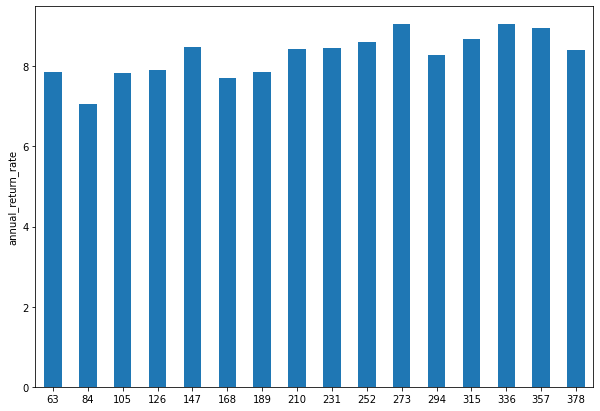

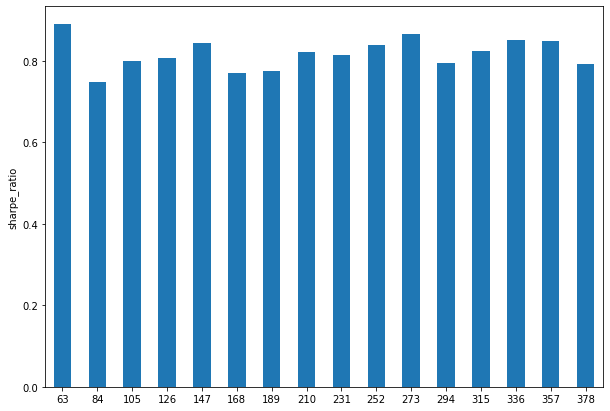

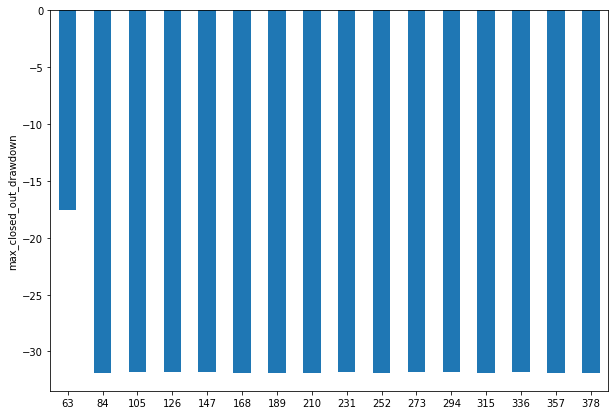

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1995-01-27 00:00:00 BUY  212 SPY @ 47.11
2020-06-22 00:00:00 SELL 212 SPY @ 310.62


Equity curve

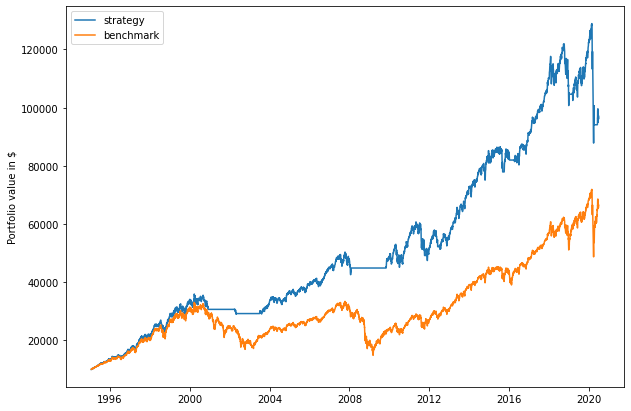

In [9]:
pf.plot_equity_curve(strategies['252'].dbal, benchmark=benchmark.dbal)